Tutorial 1: Colab and the Dataset

This document acts as an explanation for the dataset and how to use Google Colab and Jupyter Notebook to manipulate data for machine learning.

If you have never used Google Colab, it is relatively easy to set up and use with a Google account. An introduction and tutorials can be found at https://colab.research.google.com/?utm_source=scs-index


A full explanation for Jupyter Notebook can be found on the main page at https://jupyter.org/ It is not necessary to use Jupyter, any python IDE will work, but there are several benefits to using Google Colab and Jupyter together.


1.   Remote resources for GPU/CPU through Google Colab. You can utlize the 'hosted runtime' feature to use remote GPU or CPU for data processing if your local machine cannot handle dataset sizes or training. This is free, but does have time limits and memory limits.
    1.  https://www.geeksforgeeks.org/how-to-use-gpu-in-google-colab/
    2.  https://www.tutorialspoint.com/google_colab/google_colab_using_free_gpu.htm


2.   Consistent environment. Rather than focusing on how to set up an IDE on a variety of systems, we can just straight into the dataset and machine learning approaches.

3. Ability to re-run cells, correct errors, or install libraries without restarting the entire program. If you run into an error, or need a library installed, update the code and re-run the cell.



In Google Colab, you can mount your Google Drive to access and manipulate files stored in it.

You can either mount the drive manually, or execute the code below.

Adding manually:
1. Open a new or existing Colab notebook.
2. Click on the left-hand side of the screen to reveal the sidebar.
3. Click on the "Files" tab in the sidebar.
4. Click on the "Mount Drive" opion icon.

In [1]:
# code for mounting the Google drive - remove this if running locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the libraries

In [2]:
# for data and number manipulation
import pandas as pd
import numpy as np

# for visualization of data
import matplotlib.pyplot as plt



There is one, cleaned dataset included in the repository. These data have been sampled from the larger AntennaCAT set for the purpose of demonstration of machine learning techniques. The set is unbalanced, with 2 classes having ~10k samples, and the third having ~7k.

Data in these sets are all simulated with copper ground planes, copper conductors, and with FR4 substrate (permitivity: 4.4). The first row in the csv file is the labels for each columns. Every row after that is data from one simulation.

In 'colab_dataset_microstrip', there are 27026 simulation entries with 13 columns.  The microstrip width is held constant at 3 mm for a 50 ohm impedence match. The gap between the strip and the patch is held constant at 1 mm.

1. "target_freq": the target design frequency in Hz. There are 3 frequencies (classes): 1.5 GHz, 2.4 GHz, 5.8 GHz.
2. "\$width": the width of the patch in mm.
3. "\$length": the length of the patch in mm.
4. "\$depth": the depth of the substrate in mm.
5. "\$ground_plane": the value in mm for the length and width of the ground plane square.
6. "\$x_0": the notch depth/feed point of the patch in mm.
7. "max_total_gain": maximum total simulated gain in dB.
8. "max_total_directivity": maximum total simulated directivity in dB.
9. "min_s11_f": the frequency for the lowest return loss value in dB (does not need to be the target frequency). This is not necessarily the target or local resonance.
10. "min_s11_dB": the lowest return loss value in dB for the frequency above.
11. "s11_at_target": the value of the return loss at the target frequency in dB.
12. "local_resonance_f": the frequency of the closest resonance to the target resonance in Hz.
13. "local_resonance_dB": the return loss of the local resonance in dB.



In [4]:
# an example path for google sheets. replace with your file location
filepath = "/content/drive/MyDrive/2024-URSI/colab_dataset_microstrip.csv"

# read in the file as 'dataset'
dataset = pd.read_csv(filepath)

In [5]:
# preview first 5 lines
print(dataset.head(5))

   target_freq  $width  $length  $depth  $ground_plane  $x_0  max_total_gain  \
0   1500000000    55.0     37.0     1.6             74   1.0        0.810812   
1   1500000000    55.0     37.0     1.6             74   1.0        0.783770   
2   1500000000    55.0     37.0     1.6             74   1.0        0.910191   
3   1500000000    55.0     37.0     1.6             74   1.0        0.774124   
4   1500000000    55.0     37.0     1.6             74   1.0        0.825662   

   max_total_directivity     min_s11_f  min_s11_dB  s11_at_target  \
0                6.34188  2.503200e+09  -16.425742      -0.586875   
1                6.36314  2.507800e+09  -16.487843      -0.594788   
2                6.35023  2.519300e+09  -18.124388      -0.590138   
3                6.35062  2.496300e+09  -16.620786      -0.573468   
4                6.38758  2.514700e+09  -20.023111      -0.573004   

   local_resonance_f  local_resonance_dB  
0       1.804000e+09          -11.764573  
1       1.806300e+

In [6]:
# print the featuers and the labels
print(list(dataset.columns))

['target_freq', '$width', '$length', '$depth', '$ground_plane', '$x_0', 'max_total_gain', 'max_total_directivity', 'min_s11_f', 'min_s11_dB', 's11_at_target', 'local_resonance_f', 'local_resonance_dB']


In [7]:
# print the shape of the dataset.
# In this example, the first number (the rows) is the number of simulations that
# were run, and the second number is the features (the data that was logged)
print(dataset.shape)

(27026, 13)


Use column labels to pull data from the dataframe

In [8]:
# extract 'local_resonance_f' column from the dataframe and convert to a numpy array.
# these labels are already numeric, so there is no need to convert from a string
# to a surrogate value for classification
targets = dataset['local_resonance_f'].to_numpy()
print(targets)  # print the numpy array
print(type(targets[0])) # print the TYPE of the value at index 0 (the first index)

[1.804000e+09 1.806300e+09 1.794800e+09 ... 6.752000e+09 6.617040e+09
 6.765496e+09]
<class 'numpy.float64'>


Select parameters will be used to train models. Not all data collection may be relevant to what you want to LEARN from a model, so be selective.


In [9]:
# Select parameters by name and zip together.
w = dataset['$width'].to_numpy()
l = dataset['$length'].to_numpy()
d = dataset['$depth'].to_numpy()
gp = dataset['$ground_plane'].to_numpy()
x0 = dataset['$x_0'].to_numpy()

# print data and class
print(w)
print(type(w))

# zip into 2D array.
zippedData = np.dstack((w, l, d, gp, x0))
exData = zippedData[0]
print(exData)
print(exData[0])


[55.  55.  55.  ... 19.5 19.5 19.5]
<class 'numpy.ndarray'>
[[55.   37.    1.6  74.    1.  ]
 [55.   37.    1.6  74.    1.  ]
 [55.   37.    1.6  74.    1.  ]
 ...
 [19.5  15.5   1.6  31.    2.75]
 [19.5  15.5   1.6  31.    2.75]
 [19.5  15.5   1.6  31.    2.75]]
[55.  37.   1.6 74.   1. ]


Plot data for visualization

Text(0.5, 1.0, 'W/L ratio of collected data')

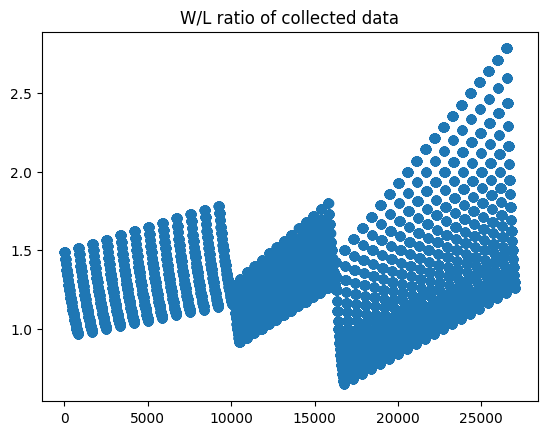

In [23]:

# linear spacing from 0 to the length of w, with w elements
x_ax = np.linspace(0, len(w), len(w))
plt.scatter(x_ax, w/l)
plt.title("W/L ratio of collected data")

# NOTE: this trend is prevalent due to how the data was collected. This is showing the spread of ALL of the w/l values.
# the 'crop row' lines are caused because of the parameter sweep
# however, there are relations that can be extracted with the length and width ratio, which is shown in the following tutorials